In [1]:
import re
from statistics import mean
from tabulate import tabulate
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
with open('lh.atf') as f:
    lines = f.read().split('\n')
prologue_start = 0
prologue_end = lines.index('@law 1')
epilogue_start = lines.index('@epilogue')
epilogue_end = -1
prologue = lines[prologue_start:prologue_end]
epilogue = lines[epilogue_start:epilogue_end]

In [3]:
# normed_words = ' '.join([line.split(":")[1].strip() for line in prologue+epilogue if line.startswith('#tr.ts')]).split()
normed_words = ' '.join([line.split(":")[1].strip() for line in lines if line.startswith('#tr.ts')]).split()

print(normed_words[:5])
print(len(normed_words), 'words')

['īnu', 'anum', 'ṣīrum', 'šar', 'anunnakī']
6976 words


In [4]:
STOP_WORDS = ['ina', 'ša', 'ana', 'u', 'lā', 'šū', 'kīma', 'šumma']
# remove stop words
normed_words = [word for word in normed_words if word not in STOP_WORDS]
print(normed_words[:5])
print(len(normed_words), 'words')

['īnu', 'anum', 'ṣīrum', 'šar', 'anunnakī']
5473 words


In [5]:
unique_words = set(normed_words)

In [6]:
counts = dict.fromkeys(unique_words, 0)
for word in normed_words:
    counts[word] += 1

In [7]:
# pass in dict of word counts, and array of corpus
def compute_tf(word_dict, corpus):
    tf_dict = {}
    corpus_count = len(corpus)
    for word, count in word_dict.items():
        tf_dict[word] = count / float(corpus_count)
    return tf_dict

In [8]:
corpus_tf = compute_tf(counts, normed_words)

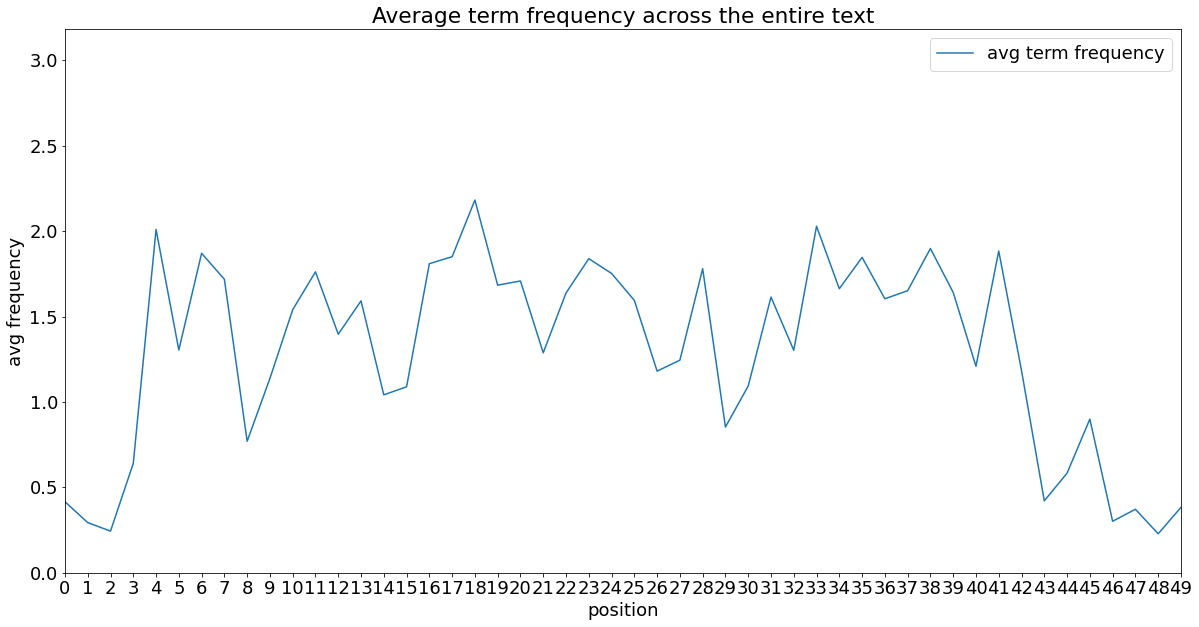

In [12]:
num_boxes = 50
box_size = len(normed_words) // (num_boxes - 1)
tf_scores = []
for i, box in enumerate([
    normed_words[i:i+box_size] 
    for i in range(0, len(normed_words), box_size)
]):
    scores = []
    for word in box:
        scores.append(corpus_tf[word])
    tf_scores.append(mean(scores))
normed_tf_scores = [score*10 for score in preprocessing.normalize([tf_scores])][0]

plt.rcParams.update({'font.size': 18})                
plt.figure(figsize=(20,10))
plt.axis([0, num_boxes-1, 0, max(normed_tf_scores)+1])

plt.plot(normed_tf_scores, label='avg term frequency')

plt.ylabel('avg frequency')
plt.xlabel('position')
plt.xticks(range(0, num_boxes))
# Draw line dividing prologue from epilogue
# plt.axvline(480 / box_size, color='red')
plt.title('Average term frequency across the entire text')
plt.legend()